In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from math import sqrt

In [23]:
def mape(y_true, y_pred):
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
    return mape

In [24]:

df = pd.read_csv('CER_data_clean.csv')
train = df.loc[:,['holidays', 'Hour', 'Month', 'Days', 'Temperature', 'humiduity', 'Wind_speed']]
target = df["Power"]
print(train.head)
print(target.head)
x_train,x_test,y_train,y_test = train_test_split(train,target,test_size=0.01305,random_state=42)

mm = MinMaxScaler()
ss = StandardScaler()
X_train = mm.fit_transform(x_train)
X_test = mm.transform(x_test)
print(len(X_test))

'''
dataset = pd.read_csv('CER_data_clean.csv', header=0, index_col=0)
dataset = dataset.loc[:, ['Power', 'holidays', 'Hour', 'Days', 
                          'Month', 'Temperature', 'humiduity', 'Wind_speed']]
                          
 
values = dataset.values
split_point = 529 * 48
train = values[:split_point, :]
test = values[split_point:, :]
train_X, train_y = train[:, 1:], train[:, 0]
test_X, test_y = test[:, 1:], test[:, 0]

mm = MinMaxScaler()
X_train = mm.fit_transform(train_X)
X_test = mm.transform(test_X)

print(len(X_train), len(X_test))
'''

<bound method NDFrame.head of        holidays  Hour  Month  Days  Temperature  humiduity  Wind_speed
0             0   0.0      7    14        11.80       93.0        14.4
1             0   0.5      7    14        11.80       91.0        14.4
2             0   1.0      7    14        11.80       89.0        18.0
3             0   1.5      7    14        11.60       91.0        18.0
4             0   2.0      7    14        11.40       93.0        10.8
...         ...   ...    ...   ...          ...        ...         ...
25723         1  21.5     12    31         5.55       87.5         7.2
25724         1  22.0     12    31         5.60       86.0        10.8
25725         1  22.5     12    31         5.60       85.0        10.8
25726         1  23.0     12    31         5.60       84.0        10.8
25727         1  23.5     12    31         5.60       84.0        10.8

[25728 rows x 7 columns]>
<bound method NDFrame.head of 0        322.546
1        279.998
2        245.900
3        2

"\ndataset = pd.read_csv('CER_data_clean.csv', header=0, index_col=0)\ndataset = dataset.loc[:, ['Power', 'holidays', 'Hour', 'Days', \n                          'Month', 'Temperature', 'humiduity', 'Wind_speed']]\n                          \n \nvalues = dataset.values\nsplit_point = 529 * 48\ntrain = values[:split_point, :]\ntest = values[split_point:, :]\ntrain_X, train_y = train[:, 1:], train[:, 0]\ntest_X, test_y = test[:, 1:], test[:, 0]\n\nmm = MinMaxScaler()\nX_train = mm.fit_transform(train_X)\nX_test = mm.transform(test_X)\n\nprint(len(X_train), len(X_test))\n"

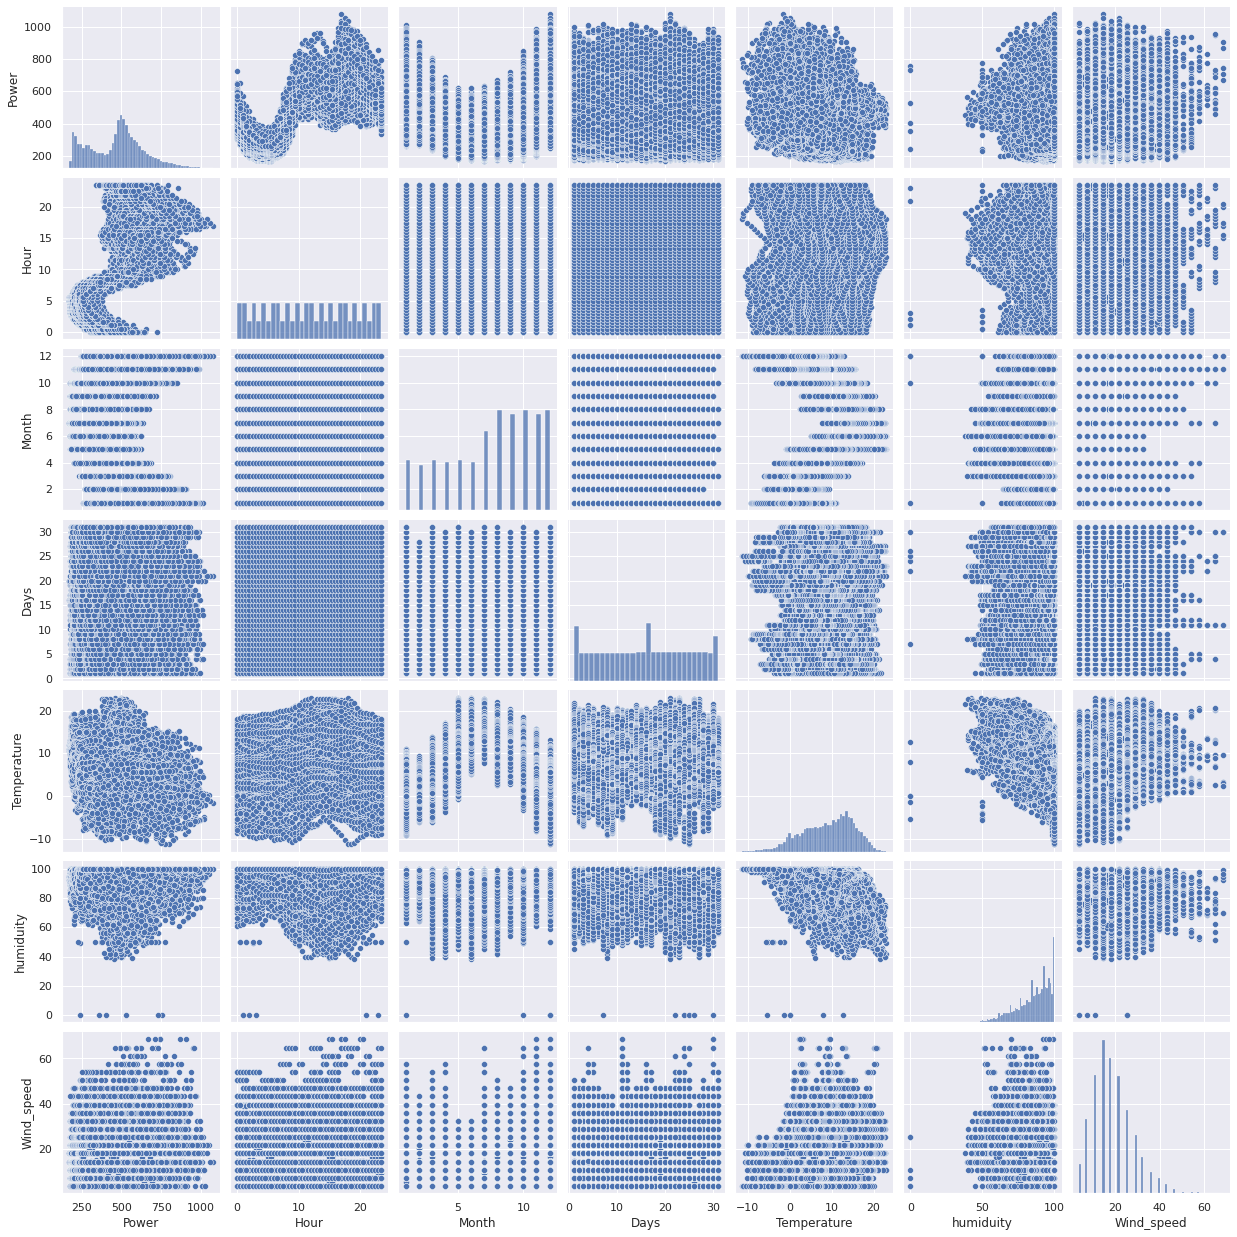

In [11]:
df = df.loc[:,['Power', 'Hour', 'Month', 'Days', 'Temperature', 'humiduity', 'Wind_speed']]
sns.pairplot(df)

/home/qcraft/Documents/Fan/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


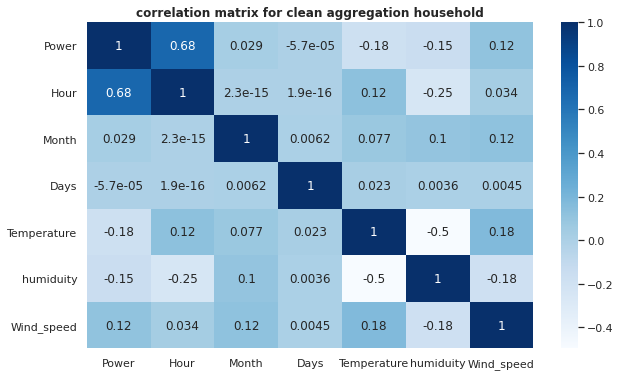

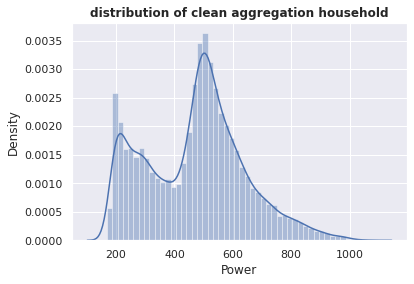

In [21]:
font1 = {
        'weight':'bold',
        'size':12,}

corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='Blues',annot=True)
plt.title('correlation matrix for clean aggregation household', font1)
plt.savefig('correlation matrix for clean aggregation household')

plt.figure(figsize=(6,4))
plt.title('distribution of clean aggregation household', font1)
sns.distplot(df['Power'])
plt.savefig('distribution of clean aggregation household')

In [16]:
from sklearn.model_selection import RandomizedSearchCV
param_distribs= {
    "C": np.arange(1, 2000).tolist(),
    "gamma": np.arange(1,500).tolist(),
}
RS_SVR =RandomizedSearchCV(SVR(kernel='rbf'),param_distribs, refit=True, cv=5, verbose=1, n_jobs=15)
RS_SVR.fit(X_train, y_train)
pd.DataFrame(RS_SVR.cv_results_)
print('score:', RS_SVR.best_score_)
print(RS_SVR.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [23]:
params = [{'gamma':[43, 44, 45, 46],'C':[950, 1000, 1050]}]
GS_SVR = GridSearchCV(SVR(kernel='rbf'), param_grid = params, refit=True, cv=5, verbose=1, n_jobs=15)
GS_SVR.fit(X_train, y_train)
pd.DataFrame(GS_SVR.cv_results_)
print('score:', GS_SVR.best_score_, GS_SVR.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
score: 0.9764616670041344 {'C': 950, 'gamma': 46}


Test RMSE: 30.171
Test MAE: 17.494
Test MAPE: 0.035


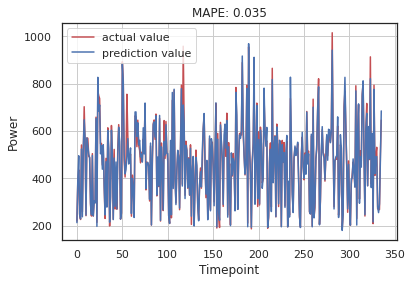

In [27]:
'''
 ['gamma': 93, 'C': 1144, 'score':0.9566636245950381]
 ['gamma': 81, 'C': 400, 'score':0.958566009734059]
 ['gamma': 82, 'C': 390, 'score':0.9585675813962216]
 {'gamma': 43, 'C': 1189， ‘score: 0.9761247718583095’, 'mae':17.734880018881707, 'mape':0.03756497016513315}
 score: 0.9763153700409454 {'C': 1000, 'gamma': 44}
 score: 0.9765185730076424, C: 1000, gamma：51
'''

rbf_svr = SVR(kernel = 'rbf', gamma=51, C=1000)
rbf_svr.fit(X_train, y_train)
rbf_svr_y_pred = rbf_svr.predict(X_test)
mae = metrics.mean_absolute_error(y_test, rbf_svr_y_pred)
mape = metrics.mean_absolute_percentage_error(y_test,rbf_svr_y_pred)
rmse = rmse = sqrt(mean_squared_error(y_test,rbf_svr_y_pred))
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f' % mape)

plt.plot(range(len(y_test)), y_test, c='r', label='actual value')
plt.plot(range(len(rbf_svr_y_pred)), rbf_svr_y_pred, c='b', label='prediction value')
plt.grid(True)
plt.legend()
plt.title('MAPE: %.3f' % mape)
plt.xlabel('Timepoint')
plt.ylabel('Power')
plt.show()


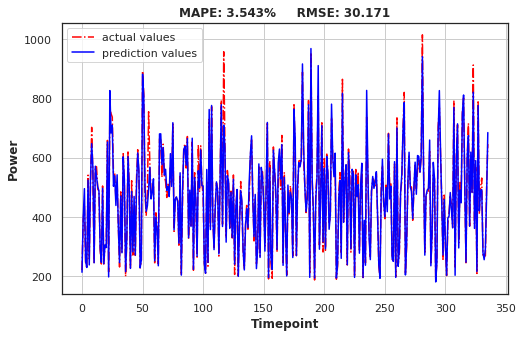

In [31]:
mape *= 100
sns.set_style('white')
font1 = {
        'weight':'bold',
        'size':12,}
plt.figure(figsize=(8, 5))
plt.plot(range(len(y_test)), y_test, ls='-.', c='red', label='actual values')
plt.plot(range(len(rbf_svr_y_pred)), rbf_svr_y_pred, ls='-', c='blue', label='prediction values')
plt.grid(True)
plt.legend()
plt.title('MAPE: %.3f%%' % mape + '     ' + 'RMSE: %.3f' % rmse, font1)
plt.xlabel('Timepoint', font1)
plt.ylabel('Power', font1)
plt.savefig('SVR_clean_aggregation_results')
plt.show()



最大得分：0.9765185730076424 gamma：6


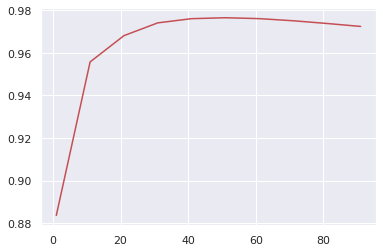

In [27]:
from sklearn.model_selection import cross_val_score
score_lt = []
for i in range(0,100,5):
    for j in range(0, 1000, )
    svr = SVR(gamma=i+1, C=1000)
    score = cross_val_score(svr, X_train, y_train, cv=5).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('score：{}'.format(score_max),
      'gamma：{}'.format(score_lt.index(score_max)*10+1))

# 绘制学习曲线
x = np.arange(1,101,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.show()